In [1]:
import pandas as pd
import pandas as pd
from tensorflow.keras.optimizers import Adam

import tensorflow as tf

In [2]:
dataset = tf.keras.utils.get_file("train.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv")

# Read the dataset into a Pandas DataFrame
TITANIC = pd.read_csv(dataset)

In [3]:
import sys
sys.path.append('..')
from xDL.models.NATTLSS import NATTLSS

In [4]:
model = NATTLSS(
    "survived ~  -1 + MLP(fare) + MLP(age) + Transformer(sex):Transformer(deck):Transformer(embark_town)", 
    data=TITANIC, 
    feature_dropout=0.0001, 
    family="Logistic")

In [5]:
optimizer = Adam(learning_rate=0.001)
model.compile(
    optimizer = optimizer,
    loss = {"output": model.NegativeLogLikelihood, "importances": None, "att_weights": None},
    metrics= {"output": [tf.keras.metrics.AUC(name="PR AUC", curve='PR'), tf.keras.metrics.AUC(name="auc")], "importances": None, "att_weights": None},)

history = model.fit(
    model.training_dataset, 
    epochs=30, 
    validation_data=model.validation_dataset,
    verbose=1
)

Epoch 1/30
1/1 [==============================] - 17s 17s/step - loss: 2.6438 - output_loss: 2.6438 - output_PR AUC: 0.3852 - output_auc: 0.5030 - val_loss: 0.9674 - val_output_loss: 0.9674 - val_output_PR AUC: 0.4900 - val_output_auc: 0.5520
Epoch 2/30
1/1 [==============================] - 0s 298ms/step - loss: 1.5326 - output_loss: 1.5326 - output_PR AUC: 0.4027 - output_auc: 0.5124 - val_loss: 0.9189 - val_output_loss: 0.9189 - val_output_PR AUC: 0.4960 - val_output_auc: 0.5351
Epoch 3/30
1/1 [==============================] - 0s 273ms/step - loss: 1.9681 - output_loss: 1.9681 - output_PR AUC: 0.3940 - output_auc: 0.5172 - val_loss: 0.8462 - val_output_loss: 0.8462 - val_output_PR AUC: 0.4018 - val_output_auc: 0.4734
Epoch 4/30
1/1 [==============================] - 0s 268ms/step - loss: 1.3119 - output_loss: 1.3119 - output_PR AUC: 0.3644 - output_auc: 0.4789 - val_loss: 0.7855 - val_output_loss: 0.7855 - val_output_PR AUC: 0.3782 - val_output_auc: 0.5149
Epoch 5/30
1/1 [=========

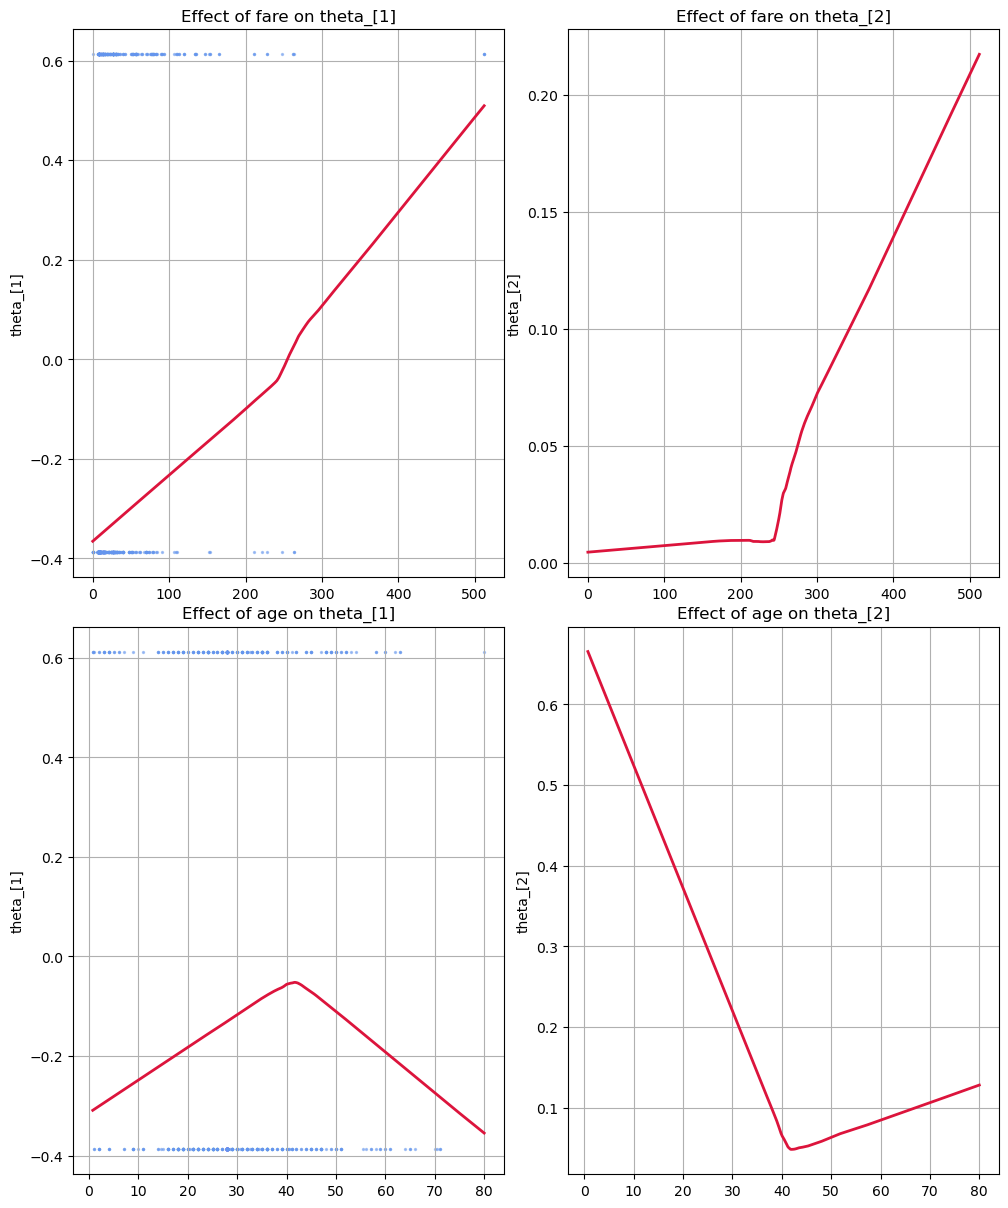

In [6]:
model.plot()

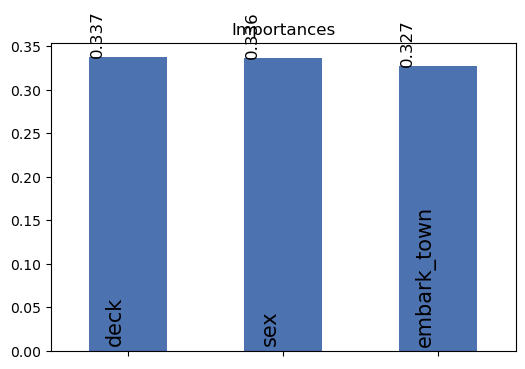

In [7]:
model.plot_importances()

<Figure size 1200x400 with 0 Axes>

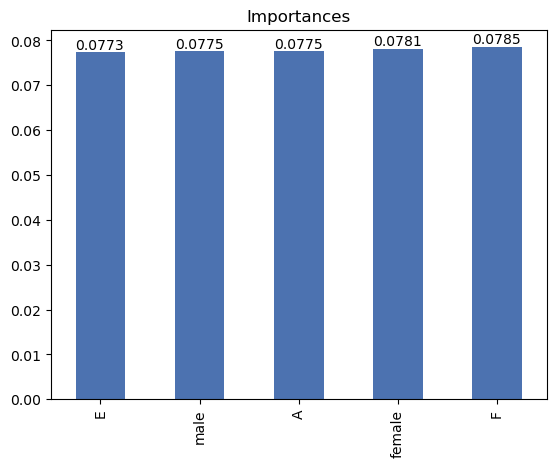

In [8]:
model.plot_categorical_importances()

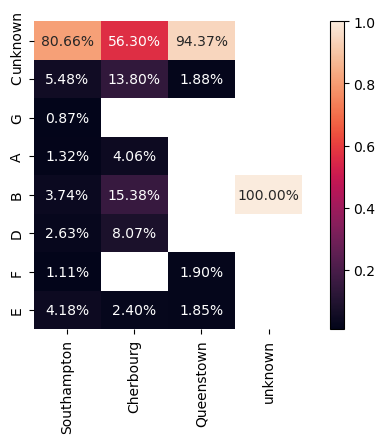

In [9]:
model.plot_heatmap_importances("embark_town", "deck")